<a href="https://colab.research.google.com/github/blaewood/Python_DataMining/blob/main/DataMining_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

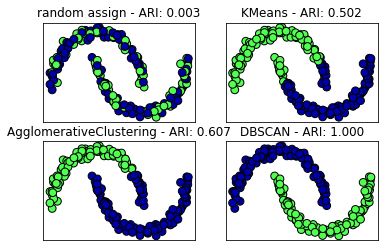

In [8]:
###Data Set 1: two-moons(a simple toy dataset to visualize clustering algorithms)###

# library import

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mglearn

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score



# matplotlib 설정
matplotlib.rc('font', family='AppleGothic') # 한글출력
plt.rcParams['axes.unicode_minus'] = False # 축 -표시



# dataset
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)



# pre-processing
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)


# model list
algorithms = [KMeans(n_clusters=2),
              AgglomerativeClustering(n_clusters=2),
                      DBSCAN()]

kmean_pred = algorithms[0].fit_predict(x_scaled)

# random cluster
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))


### visualization
fig, axes = plt.subplots(2, 2, subplot_kw={'xticks':(), 'yticks':()})





axes[0,0].scatter(x_scaled[:, 0], x_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='k')
axes[0,0].set_title('random assign - ARI: {:.3f}'.format(adjusted_rand_score(y, random_clusters))) # 실제, 모델로 구한 클러스터
axes[0,1].scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmean_pred, cmap=mglearn.cm3, s=60, edgecolors='k')
axes[0,1].set_title('{} - ARI: {:.3f}'.format(algorithms[0].__class__.__name__, #__class__.__name__ ==> 클래스에서 이름 속성
                                              adjusted_rand_score(y, kmean_pred)))



for ax, algorithm in zip(axes.ravel()[2:], algorithms[1:]):
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='k')
    ax.set_title('{} - ARI: {:.3f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))
plt.show()

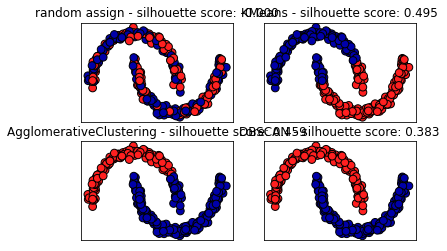

In [9]:
# library import
from sklearn.metrics.cluster import silhouette_score



# datasets
x, y = make_moons(n_samples=300, noise=0.05, random_state=0)



# pre-processing
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)


# random cluster
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(0, 2, size=len(x)) # randint(low, high, size)



# K-Means 모델
kmeans = KMeans(n_clusters=2)
kmeans_pred = kmeans.fit_predict(x_scaled)

### visualization
fig, axes = plt.subplots(2, 2,
                         subplot_kw={'xticks':(), 'yticks':()})
ax = axes.ravel()



# random cluster 그리기
ax[0].scatter(x_scaled[:, 0], x_scaled[:,1], c=random_clusters,
            cmap=mglearn.cm2, edgecolors='k', s=60)
ax[0].set_title('random assign - silhouette score: {:.3f}'.format(silhouette_score(x_scaled, random_clusters))) # silhouette_score(훈련데이터, 예측한 클러스터)



# K-Means 그리기

ax[1].scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmeans_pred,
           cmap=mglearn.cm2, edgecolors='k', s=60)
ax[1].set_title('{} - silhouette score: {:.3f}'.format(kmeans.__class__.__name__,
                                                 silhouette_score(x_scaled, kmeans_pred)))



# AgglomerativeClustering과 DBSCAN 그리기

algorithms = [AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, model in zip(ax[2:], algorithms):
    cluster = model.fit_predict(x_scaled)
    ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=cluster,
               cmap=mglearn.cm2, edgecolors='k', s=60)
    ax.set_title('{} - silhouette score: {:.3f}'.format(model.__class__.__name__,
                                                  silhouette_score(x_scaled, cluster)))

plt.show()